### Simple Linear Regression on powerproduction dataset
#### GMIT Fun Data Analysis Project - Brendan Ryan

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#load in the dataset
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

In [9]:
#have a look at dataset to make sure everything is ok
df.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [7]:
df.tail()

,speed,power
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


In [10]:
#lets have a look at a simple plot

In [18]:
x = df["speed"]
y = df["power"]

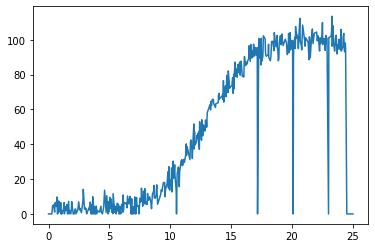

In [20]:
plt.plot(x,y);